In [11]:
import matplotlib.pyplot as plt
import numpy as np
from gwpy.timeseries import TimeSeries
from math import pi

t_gps = 1126259462.0
t_start = t_gps - 2.0

def GetPeakTime(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(data)]
    return t_peak

def SubtractPeakTime(time, data): 
    """ Subtract the peak time of some data """
    t_peak = time[np.argmax(data)]
    return time - t_peak

In [29]:
p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/PHENOM_dCS_0p0_100/'
bw_p = p + '/BayesWave/Run/trigtime_1126259462.000000000_0.0_0.0_0/'

det = 'L1' 

## Read in Frames injected waveform
h_inj = TimeSeries.read(source = p + '/Frames/' + det + '.gwf', channel=det + ':LDAS_STRAIN')
t_inj = np.array(h_inj.times)

## Read in BayesWave whitened injected waveform 
h_bw_inj = np.loadtxt(bw_p + 'post/whitened_data_' + det + '.dat')
t_bw_inj = np.array([1.0/2048 * t for t in range(len(h_bw_inj))])
t_bw_inj = t_bw_inj + t_start

## Read in BayesWave reconstruction (this is whitened)
bw_f = bw_p + "post/signal/signal_median_time_domain_waveform_" + det + ".dat"
t_bw, bw_d1, bw_d2, bw_d3, bw_d4, bw_d5 = np.loadtxt(bw_f, comments="#",usecols=([0,1,2,3,4,5]),unpack=True)    
t_bw = t_bw + t_start

In [30]:
## Read in LI reconstructed whitened data
bilby_p = 'LI_reconstruct/'

tw_bilby_rec, hw_low_bilby_rec, hw_med_bilby_rec, hw_high_bilby_rec = \
        np.loadtxt(p +  bilby_p + det + '_summary_waveforms_samples.dat', \
        comments="#",usecols=([0,3,4,5]),unpack=True)

## Read in LI reconstruction
t_bilby_rec, h_low_bilby_rec, h_med_bilby_rec, h_high_bilby_rec = \
        np.loadtxt(p + bilby_p + det + '_summary_waveforms_samples.dat', \
        comments="#",usecols=([0,7,8,9]),unpack=True)

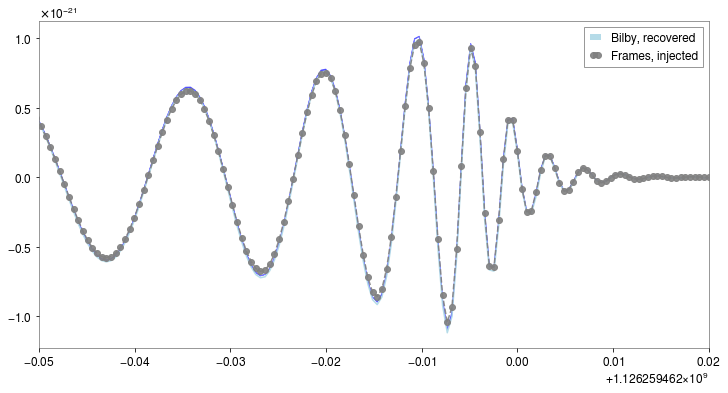

In [31]:
## Plot reconstructed data
plt.figure(figsize = (12, 6))
plt.plot(t_bilby_rec, h_med_bilby_rec, color = 'lightblue', label = 'Bilby, recovered', alpha = 0.9)
plt.fill_between(t_bilby_rec, h_low_bilby_rec, h_high_bilby_rec, color = 'blue', alpha = 0.5)
plt.plot(t_inj, h_inj, '--o', label = 'Frames, injected', color = 'gray', alpha = 0.9)
plt.legend()
plt.grid()
plt.xlim(t_gps - 0.05, t_gps + 0.02)

plt.show()


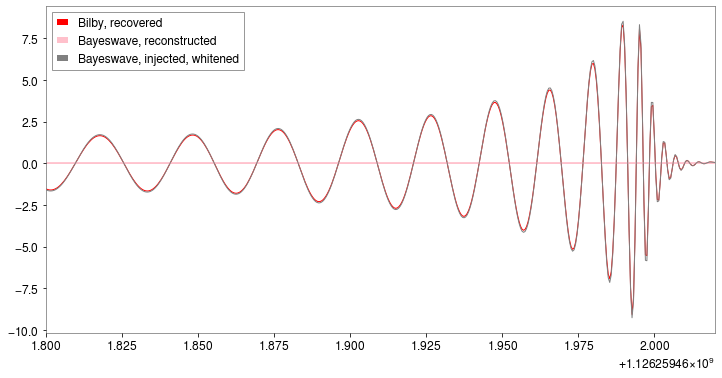

In [32]:
## Plot reconstructed data (whitened)
plt.figure(figsize = (12, 6))
plt.plot(tw_bilby_rec, hw_med_bilby_rec, color = 'red', label = 'Bilby, recovered', lw = 1.0)
#plt.fill_between(tw_bilby_rec, hw_low_bilby_rec, hwhigh_bilby_rec, color = 'blue', alpha = 0.5)

plt.plot(t_bw, bw_d1, color = 'pink', label = 'Bayeswave, reconstructed')
plt.fill_between(t_bw, bw_d4, bw_d5, color = 'pink', alpha = 0.8)
plt.plot(t_bw_inj, h_bw_inj, label = 'Bayeswave, injected, whitened', color = 'gray', lw = 1.0)
plt.legend()
plt.grid()
plt.xlim(t_gps - 0.2, t_gps + 0.02)

plt.show()
